# Generate Report Results

### 1. 读取3组5台模拟钟组数据，分别为无相关，有3个（135）相关，全相关

In [1]:
# 1. Read data with 0 covariance and 5 covariance
import numpy as np
import pandas as pd

real_5clock_csv = "5台钟数据.csv"
real_5clock_df = pd.read_csv(real_5clock_csv)

print(real_5clock_df)
print(real_5clock_df.shape)
print("----------------------------------------")

        ClockID=1404850|Channel=03  ClockID=1404849|Channel=04  \
0                     1.433212e+07                1.432687e+07   
1                     1.433212e+07                1.432687e+07   
2                     1.433212e+07                1.432687e+07   
3                     1.433212e+07                1.432687e+07   
4                     1.433212e+07                1.432687e+07   
5                     1.433212e+07                1.432687e+07   
6                     1.433212e+07                1.432687e+07   
7                     1.433212e+07                1.432687e+07   
8                     1.433212e+07                1.432687e+07   
9                     1.433212e+07                1.432687e+07   
10                    1.433212e+07                1.432687e+07   
11                    1.433212e+07                1.432687e+07   
12                    1.433212e+07                1.432687e+07   
13                    1.433212e+07                1.432687e+07   
14        

In [2]:
data_df = real_5clock_df.iloc[:69767,]

In [3]:
row_scaling_type = "diff"   # "diff", "first"
row_select = "btw_69770_82982" # "before_69770", "btw_69770_82982", "after_82982"

if row_scaling_type == "diff":
    if row_select == "before_69770":
        data_df = real_5clock_df.iloc[:69767,]
    elif row_select == "btw_69770_82982":
        data_df = real_5clock_df.iloc[69768:82979,]
    elif row_select == "after_82982":
        data_df = real_5clock_df.iloc[82980:,]       
    real_5clock_data = data_df.diff(axis=0, periods=1).iloc[1:,:].transpose().values
elif row_scaling_type == "first":
    if row_select == "before_69770":
        data_df = real_5clock_df.iloc[:69767,]
    elif row_select == "btw_69770_82982":
        data_df = real_5clock_df.iloc[69768:82979,]
    elif row_select == "after_82982":
        data_df = real_5clock_df.iloc[82980:,]
    real_5clock_data = (data_df - data_df.iloc[0,:]).iloc[1:,:].transpose().values
else:
    if row_select == "before_69770":
        data_df = real_5clock_df.iloc[:69767,]
    elif row_select == "btw_69770_82982":
        data_df = real_5clock_df.iloc[69768:82979,]
    elif row_select == "after_82982":
        data_df = real_5clock_df.iloc[82980:,]
    real_5clock_data = data_df.transpose().values

print(real_5clock_data.shape)
print(real_5clock_data[0,])
print("----------------------------------------")

(5, 13210)
[-0.0109004  -0.0107776  -0.011461   ... -0.01621991 -0.00978112
 -0.01166016]
----------------------------------------


In [4]:
# # Handle error data
# real_5clock_data[:,63658] = (real_5clock_data[:,63659] + real_5clock_data[:,63657]) / 2
# print(real_5clock_data[:,63658])

# real_5clock_data[:,27721] = (real_5clock_data[:,27722] + real_5clock_data[:,27720]) / 2
# print(real_5clock_data[:,27721])

# real_5clock_data[:,27723] = (real_5clock_data[:,27724] + real_5clock_data[:,27722]) / 2
# print(real_5clock_data[:,27723])

# real_5clock_data[:,52127] = (real_5clock_data[:,52128] + real_5clock_data[:,52126]) / 2
# print(real_5clock_data[:,52127])

# real_5clock_data[:,28547] = (real_5clock_data[:,28550] + real_5clock_data[:,28546]) / 2
# print(real_5clock_data[:,28547])

# real_5clock_data[:,28548] = (real_5clock_data[:,28550] + real_5clock_data[:,28547]) / 2
# print(real_5clock_data[:,28548])

# real_5clock_data[:,28549] = (real_5clock_data[:,28550] + real_5clock_data[:,28548]) / 2
# print(real_5clock_data[:,28548])

In [5]:
row_interval = 5 * 60 * 10**9  # 5 min = (5 * 60 * 10**9) ns
real_5clock_data = real_5clock_data / row_interval
print(real_5clock_data[0,])
print("----------------------------------------")

[-3.63346660e-14 -3.59253330e-14 -3.82033337e-14 ... -5.40663797e-14
 -3.26037407e-14 -3.88671957e-14]
----------------------------------------


In [6]:
for i in range(real_5clock_data.shape[0]):
    minx = max(real_5clock_data[i,])
    print(minx)
    print(list(real_5clock_data[i,]).index(minx))

-2.159923333332851e-14
6943
-9.553134433341862e-14
6943
-6.998578666639332e-15
9659
1.0313342033337373e-13
9659
2.0500024166665298e-13
6818


### 2. 绘制allan方差曲线

In [7]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03]
adevs - [7.81066098e-15 4.13438732e-15 1.96240797e-15 1.03574354e-15
 4.60253836e-16 2.46061372e-16 1.55288309e-16 1.37172647e-16
 1.60186436e-16 2.06000066e-16 2.74080421e-16 3.05752568e-16
 5.79347418e-16]
----------------------------------------
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03]
adevs - [8.21886276e-15 4.66682988e-15 2.91020868e-15 2.37620693e-15
 1.92798901e-15 1.54475362e-15 1.07952910e-15 7.46876586e-16
 5.00793959e-16 5.89949754e-16 4.92255511e-16 5.97648664e-16
 1.11035478e-15]
----------------------------------------
taus - [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
 1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03]
adevs - [8.10364548e-15 4.47274412e-15 2.58443024e-15 1.96116027e-15
 1.55470341e-

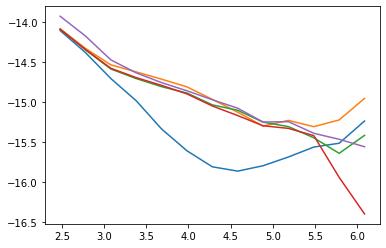

In [8]:
# calculate allan variance for original data
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(real_5clock_data.shape[0]):
    (taus, adevs, errors, ns) = allantools.adev(data=real_5clock_data[i,:], data_type='freq')
    print('taus - %s' % taus)
    print('adevs - %s' % adevs)
    print("----------------------------------------")
    plt.plot(np.log10(taus * 5 * 60), np.log10(adevs))

### 3. 计算Gamma

#### (1) For each 2 clocks calculate (OPTION)

$ 1/M * \sum_{i=0}^{M}[\Delta y_{A}^{i}(\tau)\Delta y_{B}^{i}(\tau)] $

In [9]:
# def rolling_diff(arr, tau = 1):
#     # tau should be the power of 2
#     # arr is a one-dimension array
#     if tau >= len(arr):
#         raise Exception('tau %s is bigger or equal than length of array %s ' % (tau, len(arr)))
#     else:
#         result = list()
#         for i in range(len(arr)):
#             if i + tau >= len(arr):
#                 break
#             else:
#                 result.append(arr[i + tau] - arr[i])
#         return np.array(result)

In [10]:
# def cal_cij_and_plot(cov_data, taus):
#     C_ij_all = list()
#     for tau in taus:
#         delta_clocks = np.apply_along_axis(func1d = rolling_diff, axis = 1, arr = cov_data, tau = tau)
#         print('tau is %s and delta_clocks has shape %s' % (tau, str(delta_clocks.shape)))
#         result = list()
#         for i in range(delta_clocks.shape[0]):
#             for j in range(delta_clocks.shape[0]):
#                 if i < j:
#                     C_ij = np.mean(np.multiply(delta_clocks[i,], delta_clocks[j,]))
#                     result.append(C_ij)
#         C_ij_all.append(result)
    
#     C_ij_all = np.array(C_ij_all)
#     print(C_ij_all)
#     print(C_ij_all.shape)
    
#     for i in range(cov_data.shape[0]):
#         for j in range(cov_data.shape[0]):
#             if i < j:
#                 print("row1: %s, row2: %s" % (i, j))
#                 (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
#                 (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
#                 C_ij = C_ij_all[:,i+j-1]
#                 multiply_adev_ij = 2 * adevs_i * adevs_j
#                 Gamma_ij = C_ij / multiply_adev_ij
#                 print('Gamma_ij - %s' % Gamma_ij)
#                 print("----------------------------------------")
#                 plt.plot(np.log10(taus), Gamma_ij)
#             else:
#                 continue

In [11]:
# taus = 2 ** np.arange(0,20)

In [12]:
#cal_cij_and_plot(cov_0_data, taus)

In [13]:
#cal_cij_and_plot(cov_5_data, taus)

#### (2) For each 2 clocks calculate

C(i,j) = Var(i) + Var(j) - Var(i-j), Gamma(i,j) = C(i,j) / (2 * Std(i) * Std(j))

In [14]:
# def cal_cij_and_plot2(cov_data):
#     for i in range(cov_data.shape[0]):
#         for j in range(cov_data.shape[0]):
#             if i < j:
#                 print("row1: %s, row2: %s" % (i, j))
#                 (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
#                 (taus_j, adevs_j, errors_j, ns_j) = allantools.adev(data=cov_data[j,:], data_type='freq')
#                 (taus_ij, adevs_ij, errors_ij, ns_ij) = allantools.adev(data=cov_data[i,:] - cov_data[j,:], data_type='freq')
#                 assert taus_i.shape == taus_j.shape == taus_ij.shape
            
#                 C_ij = adevs_i ** 2 + adevs_j ** 2 - adevs_ij ** 2
#                 multiply_adev_ij = 2 * adevs_i * adevs_j
#                 Gamma_ij = C_ij / multiply_adev_ij
            
#                 print('tau - %s' % taus_ij)
#                 print('C_ij - %s' % C_ij)
#                 print('multiply_adev_ij - %s' % multiply_adev_ij)
#                 print('Gamma_ij - %s' % Gamma_ij)
#                 print("----------------------------------------")
#                 plt.plot(np.log10(taus_ij), Gamma_ij)
#             else:
#                 continue

In [15]:
# cal_cij_and_plot2(cov_data_1)

In [16]:
# cal_cij_and_plot2(cov_data_2)

#### (3) For each group, calculate harmonic mean

In [17]:
# def cal_var_harmonic_mean(cov_group, cov_ref = None):
#     var_list = list()
#     cov_data = cov_group
#     if cov_ref is not None:
#         cov_data = cov_group - cov_ref
#     for i in range(cov_data.shape[0]):
#         (taus_i, adevs_i, errors_i, ns_i) = allantools.adev(data=cov_data[i,:], data_type='freq')
#         var_list.append(1.0 / adevs_i ** 2)
#     return taus_i, (cov_data.shape[0] / np.sum(var_list, axis=0))

In [18]:
# taus, cov_data_1_harmonic = cal_var_harmonic_mean(cov_data_1)
# print(np.sqrt(cov_data_1_harmonic))
# plt.plot(np.log10(taus), np.sqrt(cov_data_1_harmonic))

In [19]:
# taus, cov_data_2_harmonic = cal_var_harmonic_mean(cov_data_2)
# print(np.sqrt(cov_data_2_harmonic))
# plt.plot(np.log10(taus), np.sqrt(cov_data_2_harmonic))

### 4. 带入模型进行测试

In [20]:
cov_data = real_5clock_data
y_t = cov_data.T
clock_size = y_t.shape[1]

In [21]:
regularization = True
subset_size_list = [3]
window_step_list = [60*12, 60*6, 60*2, 60]
amplify = [5, 5, 10, 10]

window_size_list = [x*y for (x,y) in zip(window_step_list, amplify)]

------------------Overall------------------
*** Inverse variance weighted clock's Allan deviation ***
taus - [1. 2. 4.], adevs - [6.55716968e-15 4.59415597e-15 1.69094329e-15]
*** Weighted clock's Allan deviation ***
taus - [1. 2. 4.], adevs - [7.98177893e-15 3.46150447e-15 1.90875337e-15]
^^^ AVG performance improvement - cov_data_1 - subset_size=3 ^^^
*** Each clock's Allan deviation ***
taus - [1. 2. 4.], adevs - [9.83027793e-15 5.03234422e-15 2.07026441e-15]
taus - [1. 2. 4.], adevs - [1.05717373e-14 5.93017933e-15 1.35043771e-15]
taus - [1. 2. 4.], adevs - [1.03777112e-14 5.96281956e-15 1.50022609e-15]
taus - [1. 2. 4.], adevs - [9.89694614e-15 5.82203004e-15 2.48092625e-15]
taus - [1. 2. 4.], adevs - [9.60849971e-15 6.00394434e-15 1.82992113e-15]


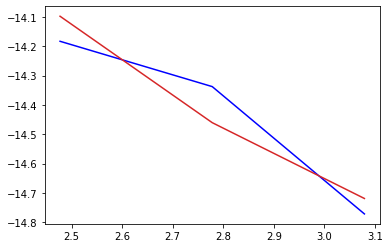

3600 720
------------------Overall------------------
*** Inverse variance weighted clock's Allan deviation ***
taus - [1. 2. 4. 8.], adevs - [6.69370431e-15 4.24241344e-15 4.40824614e-15 2.65565346e-15]
*** Weighted clock's Allan deviation ***
taus - [1. 2. 4. 8.], adevs - [7.46266181e-15 3.86518760e-15 2.66740992e-15 6.76964509e-16]
^^^ AVG performance improvement - cov_data_1 - subset_size=3 ^^^
*** Each clock's Allan deviation ***
taus - [1. 2. 4. 8.], adevs - [9.41868221e-15 4.72414049e-15 2.20491429e-15 1.00706086e-15]
taus - [1. 2. 4. 8.], adevs - [9.64375774e-15 5.10799237e-15 2.70335032e-15 2.70987831e-15]
taus - [1. 2. 4. 8.], adevs - [9.54423133e-15 5.22748521e-15 3.31013572e-15 3.12523184e-15]
taus - [1. 2. 4. 8.], adevs - [9.07803571e-15 5.25172309e-15 2.69145261e-15 1.20609127e-15]
taus - [1. 2. 4. 8.], adevs - [1.02605712e-14 5.53887996e-15 3.06343789e-15 2.45159241e-15]


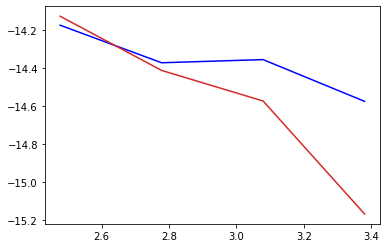

1800 360
------------------Overall------------------
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [7.15055214e-15 4.40327950e-15 3.51380152e-15 4.74076784e-15
 5.26011007e-15 1.95945000e-15]
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [7.95955072e-15 5.21050596e-15 2.52989215e-15 1.79004558e-15
 1.45533118e-15 7.16826852e-16]
^^^ AVG performance improvement - cov_data_1 - subset_size=3 ^^^
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.44637087e-15 4.39019453e-15 2.37551255e-15 8.61122072e-16
 7.40428880e-16 5.35150403e-17]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.67913659e-15 4.87150626e-15 2.68658750e-15 2.97140252e-15
 3.08719223e-15 2.36041747e-15]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.71757013e-15 4.75784877e-15 3.19096327e-15 2.20061452e-15
 2.94848262e-15 1.30125052e-15]
taus - [ 1.  2.  4.  8. 16. 32.], adevs - [8.61429307e-15 4.27284749e-1

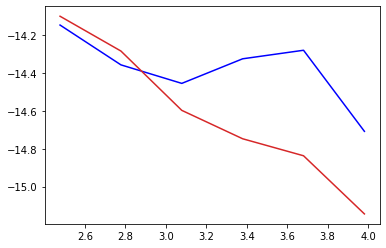

1200 120
------------------Overall------------------
*** Inverse variance weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32. 64.], adevs - [1.62100980e-14 9.56714238e-15 7.82724958e-15 5.44435813e-15
 4.98842381e-15 9.97079039e-16 6.77476244e-16]
*** Weighted clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32. 64.], adevs - [7.84555038e-15 4.42295640e-15 2.15475688e-15 1.65515501e-15
 8.75886354e-16 7.00420588e-16 1.04299111e-15]
^^^ AVG performance improvement - cov_data_1 - subset_size=3 ^^^
*** Each clock's Allan deviation ***
taus - [ 1.  2.  4.  8. 16. 32. 64.], adevs - [8.14521506e-15 4.24847729e-15 2.36628624e-15 1.12115847e-15
 5.35878012e-16 2.21054363e-16 1.91978634e-16]
taus - [ 1.  2.  4.  8. 16. 32. 64.], adevs - [8.41607905e-15 4.92438469e-15 3.62738565e-15 2.65186250e-15
 1.45512862e-15 5.54767020e-16 4.50390960e-16]
taus - [ 1.  2.  4.  8. 16. 32. 64.], adevs - [8.63522991e-15 4.82775532e-15 2.91660668e-15 1.74624771e-15
 1.85618496e-15 1.25225

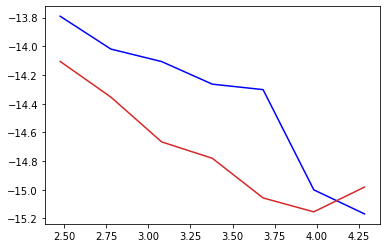

600 60
Done


In [22]:
import sys

# 0. For each (window_size, window_step) combination
for window_size, window_step in zip(window_size_list, window_step_list):
    
    if window_size > y_t.shape[0]:
        raise Exception('The window size should not be greater than the number of time points')

    all_weighted_clock_estimation = list()
        
    # 1. For each subset_size
    for subset_size in subset_size_list:
        if subset_size > clock_size:
            raise Exception('The subset size should not be greater than the number of clocks')
        A = np.ones((subset_size, 1))
            
        weighted_inverse_variance_estimation = list()
        weighted_clock_estimation = list()
#         print("------------------Subset size %s------------------" % subset_size)
        
        # 2. For each rolling window
        for i in range(int((y_t.shape[0] - window_size) / window_step) + 1):
            subset_cov_list = list()
            subset_raw_list = list()
#             print("------------------Step %s------------------" % i)
                
            # 3. For each subset
            for j in range(clock_size - subset_size + 1):
                
                # 4. Get raw subset
                subset_raw = y_t[i:i+window_size, j:j+subset_size]
        
                # 5. Calculate covariance within the subset
                subset_cov = np.cov(subset_raw, rowvar=False)
                subset_cov_list.append(subset_cov)
#                 print("*** Subset Cov ***")
#                 print(subset_cov)
                
                # 6. Calculate summation for corresponding clocks in different subsets 
                subset_raw_list.append(subset_raw)

            # 7. Calculate covariance matrix mean (Element-wise)
            allset_cov_mean = np.sum(np.asarray(subset_cov_list), axis=0) / (clock_size - subset_size + 1)
#             print("*** Cov mean ***")
#             print(allset_cov_mean)
    
            # 8. Add regularization term
            if regularization:
                sigma = np.max(allset_cov_mean) / (clock_size * 10.0)
                allset_cov_mean += sigma * np.eye(subset_size)
#                 print("*** Regularization term ***")
#                 print(sigma * np.eye(subset_size))
    
            # 9. Calculate the inverse of covariance matrix mean
            allset_cov_mean_inverse = np.linalg.inv(allset_cov_mean)
#             print("*** Inverse Cov mean ***")
#             print(allset_cov_mean_inverse)
    
            # 10. Calculate weight
            weight = np.dot(allset_cov_mean_inverse, A) / np.dot(np.dot(A.T, allset_cov_mean_inverse), A)
#             print("*** Weight ***")
#             print(weight)

            # 11. Calculate beamformer weighted clock
            subset_corresponding_sum = np.sum(subset_raw_list, axis=0).T
            Z = (np.dot(weight.T, subset_corresponding_sum) / (clock_size - subset_size + 1))[0]
#             print("*** Weighted output ***")
#             print(Z)
    
            # 12. Select the last element in Z as the estimation of weighted clock
            weighted_clock_estimation.append(Z[-1])
    
            # 13. Calculate allan variance for each clock
            inverse_variance = list()
            clock_last_row = list()
            for k in range(clock_size):
                clock = y_t[window_step * i:window_step * i + window_size + 1, k]
                (taus, adevs, errors, ns) = allantools.adev(data=clock, data_type='freq')
                inverse_variance.append(1.0 / (adevs[7] ** 2)) # using allan variance for tau = 2^8
                clock_last_row.append(clock[-1])
            inverse_variance = np.array(inverse_variance) / np.sum(np.array(inverse_variance))
#            print("*** Inverse variance weight ***")
#            print(inverse_variance)
    
            # 14. Calculate the inverse variance weighted clock
            weighted_inverse_variance_clock = np.dot(inverse_variance, np.array(clock_last_row))
            weighted_inverse_variance_estimation.append(weighted_inverse_variance_clock)
#            print("*** Inverse variance weighted clock ***")
#            print(weighted_inverse_variance_clock)
                
        all_weighted_clock_estimation.append(weighted_clock_estimation)

    # 15. Visualize weighted clock estimation and each clock
    print("------------------Overall------------------")
    '''
    print("*** Weighted clock estimation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        print("+++ Subset size = %s +++" % subset_size)
        print(weighted_clock_estimation)

    print("*** Inverse variance weighted clock estimation ***")
    print(weighted_inverse_variance_estimation)
    '''
    # 16. Calculate Allan deviation
    fig = plt.figure(facecolor='white')
        
    print("*** Inverse variance weighted clock's Allan deviation ***")
    (taus0, adevs0, errors0, ns0) = allantools.adev(data=weighted_inverse_variance_estimation, data_type='freq')
    print('taus - %s, adevs - %s' % (taus0, adevs0))
    plt.plot(np.log10(taus0 * 5 * 60), np.log10(adevs0), color='blue')
    
    print("*** Weighted clock's Allan deviation ***")
    for subset_size, weighted_clock_estimation in zip(subset_size_list, all_weighted_clock_estimation):
        (taus, adevs, errors, ns) = allantools.adev(data=weighted_clock_estimation, data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
        color = 'C%s' % subset_size
        plt.plot(np.log10(taus * 5 * 60), np.log10(adevs), color=color)
        print("^^^ AVG performance improvement - cov_data_1 - subset_size=%s ^^^" % subset_size )
        avg_imp = np.sum((adevs - adevs0) / adevs0) / len(taus)
        import logging
        logging.basicConfig(filename="6clock.log")
        logging.critical("cov_data_1: window_size=%s, window_step=%s, subset_size=%s, avg_imp=%s" % (window_size, window_step, subset_size, avg_imp))
        
    

    print("*** Each clock's Allan deviation ***")
    real_clock = y_t[-(int((y_t.shape[0] - window_size) / window_step) + 1):,]
    for i in range(real_clock.shape[1]):
        (taus, adevs, errors, ns) = allantools.adev(data=real_clock[:,i], data_type='freq')
        print('taus - %s, adevs - %s' % (taus, adevs))
            
    plt.show()
    print(window_size, window_step)

print('Done')